# rl1.ipynb

This notebook contains the first step in the 5-step process outlined in November 13th, 2020, in order to produce an actor-critic architecture for pendulum control.

The goal is to create a network with N units that takes the activity of 1 unit and transforms it into a bell-shaped representation.

To achieve bell-shaped tuning, we use the `bell_shaped_1D` unit model.

In [1]:
%cd ../..
import numpy as np
import matplotlib.pyplot as plt
import time
from draculab import *

/home/z/projects/draculab/notebook


In [2]:
N = 10 # number of S units
net_params = {'min_delay' : 0.005,
              'min_buff_size' : 10 }
A_params = {'type' : unit_types.source,
            'init_val' : 0.5,
            'function' : lambda t: 0.5*(np.sin(t)+1.) }
S_params = {'type' : unit_types.bell_shaped_1D,
            'init_val' : 0.1,
            'tau' : 0.01,
            'center' : list(np.linspace(0., 1., N)),
            'b' : 30. }

A__S_conn = {'rule' : 'all_to_all',
             'delay' : 0.02 }
A__S_syn = {'type' : synapse_types.static,
            'init_w' : 1. }
net = network(net_params)
A = net.create(1, A_params)
S = net.create(N, S_params)

net.connect(A, S, A__S_conn, A__S_syn)

In [3]:
start_time = time.time()
#times, activs, _ = net.run(10.)
times, activs, _ = net.flat_run(10.)
print('Execution time is %s seconds' % (time.time() - start_time))
activs = np.array(activs)


Execution time is 0.6732561588287354 seconds


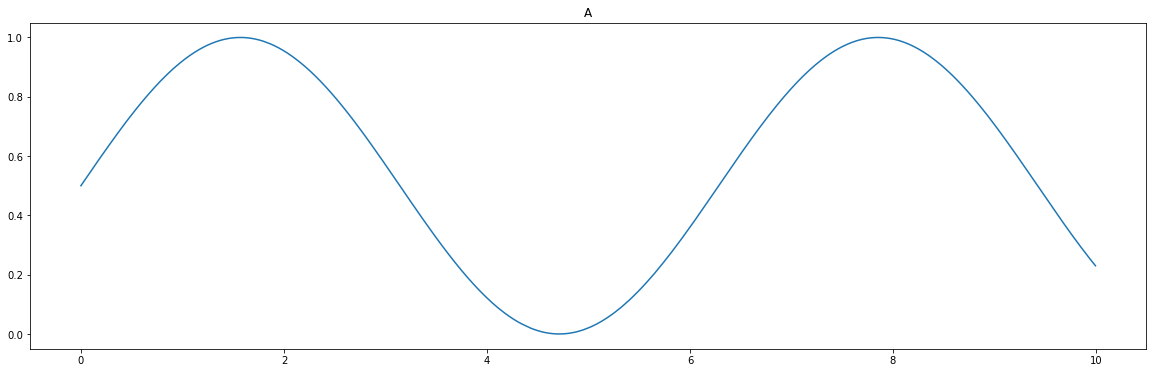

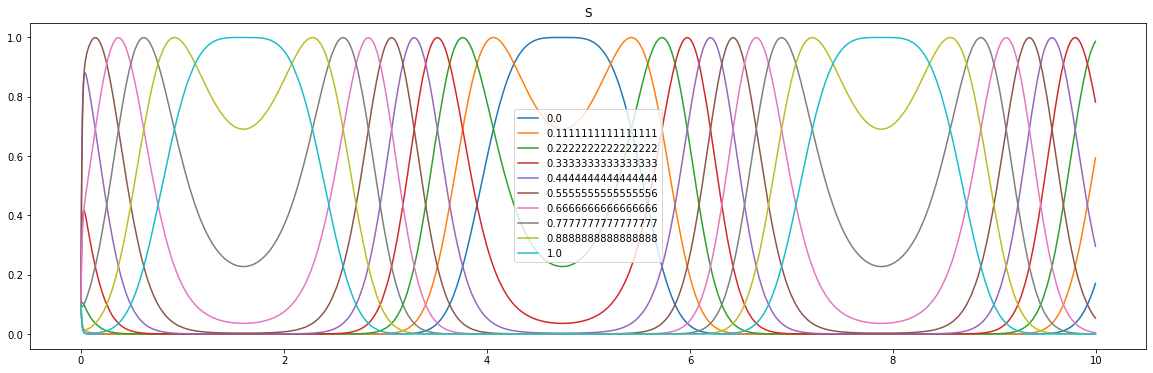

In [4]:
fs = (20,6)
A_fig = plt.figure(figsize=fs)
A_activs = np.array(activs[A])
plt.plot(times, A_activs[0])
plt.title('A')

S_fig = plt.figure(figsize=fs)
S_activs = np.array(activs[S])
plt.plot(times, S_activs.transpose())
S_legends = [str(ctr) for ctr in S_params['center']]
plt.legend(S_legends)
plt.title('S')

plt.show()